# Aşama 1: Keşifsel Veri Analizi (EDA)

**Proje**: Çelik Levha Hata Tespiti  
**Veri Seti**: Çelik Levha Hata Veri Seti (1.941 örnek)  
**Amaç**: Herhangi bir değişiklik yapmadan önce ham veriyi anlamak  
**Tarih**: Aralık 2024

---

## Genel Bakış

Bu defter şunları kapsar:
1. Ham veriyi yükleme ve inceleme
2. Veri türlerini ve yapısını anlama
3. Tek değişkenli analiz (bireysel özellikler)
4. İki değişkenli analiz (özellikler ve hedef)
5. Çok değişkenli analiz (özellik ilişkileri)
6. Veri kalitesi sorunlarını belirleme
7. Etkili görselleştirmeler oluşturma

---

## İçindekiler

1. [Kurulum ve Veri Yükleme](#1-kurulum-ve-veri-yükleme)
2. [İlk Veri İncelemesi](#2-ilk-veri-incelemesi)
3. [Tek Değişkenli Analiz](#3-tek-değişkenli-analiz)
4. [Hedef Değişken Analizi](#4-hedef-değişken-analizi)
5. [İki Değişkenli Analiz](#5-iki-değişkenli-analiz)
6. [Çok Değişkenli Analiz](#6-çok-değişkenli-analiz)
7. [Veri Kalitesi Değerlendirmesi](#7-veri-kalitesi-değerlendirmesi)
8. [Özet ve Sonraki Adımlar](#8-özet-ve-sonraki-adımlar)

---
## 1. Kurulum ve Veri Yükleme

Gerekli kütüphaneleri içe aktarın ve veri setini yükleyin.

In [1]:
# Import pandas for data manipulation and analysis
# Pandas is the primary library for working with tabular data in Python
import pandas as pd

# Import numpy for numerical operations
# Numpy provides efficient array operations and mathematical functions
import numpy as np

# Import matplotlib for creating static visualizations
# Matplotlib is the foundation of Python data visualization
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
# Seaborn builds on matplotlib and provides attractive, informative statistical graphics
import seaborn as sns

# Import warnings to suppress unnecessary warning messages
# This keeps our output clean and focused on results
import warnings

# Configure visualization settings
# This ensures plots appear inline in the notebook (not in separate windows)
%matplotlib inline

# Set the default figure size for all plots
# (width=12 inches, height=6 inches) - makes plots easier to read
plt.rcParams['figure.figsize'] = (12, 6)

# Set seaborn style to 'whitegrid' for clean, professional-looking plots
# This adds subtle gridlines that make it easier to read values
sns.set_style('whitegrid')

# Set color palette to 'husl' for visually appealing, distinct colors
# HUSL palette ensures colors are perceptually uniform
sns.set_palette('husl')

# Suppress warnings to keep output clean
# FutureWarnings are about upcoming changes in libraries, not errors
warnings.filterwarnings('ignore')

# Set pandas display options for better readability
# Show maximum 100 rows when displaying dataframes
pd.set_option('display.max_rows', 100)
# Show maximum 50 columns when displaying dataframes
pd.set_option('display.max_columns', 50)
# Display floating point numbers with 2 decimal places
pd.set_option('display.precision', 2)

# Print confirmation message
print("✓ Libraries imported successfully!")
print("✓ Visualization settings configured")
print("\n📊 Ready to explore the data!")

✓ Libraries imported successfully!
✓ Visualization settings configured

📊 Ready to explore the data!


### Veri Setini Yükle

In [2]:
# Define the path to our raw data file
# Using relative path from notebooks/ directory to data/raw/
# This makes the code portable - works on any machine with the same structure
data_path = '../data/raw/steel_plates_fault.csv'

# Load the CSV file into a pandas DataFrame
# The dataset has headers in the first row
df = pd.read_csv(data_path)

# Print confirmation message with dataset shape
# shape returns (number of rows, number of columns)
print("✓ Dataset loaded successfully!")
print(f"\n📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   - {df.shape[0]:,} steel plate samples")
print(f"   - {df.shape[1]} features (including target)")

✓ Dataset loaded successfully!

📊 Dataset shape: 1,941 rows × 28 columns
   - 1,941 steel plate samples
   - 28 features (including target)


---
## 2. İlk Veri İncelemesi

Veri setinin yapısını ve temel özelliklerini inceleyin.

### 2.1 Veriye İlk Bakış

In [3]:
# Display the first 5 rows of the dataset
# head() method shows the beginning of the dataset
# This gives us a quick preview of what the data looks like
print("📋 First 5 rows of the dataset:\n")
df.head()

📋 First 5 rows of the dataset:



,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.05,0.24,0.18,4.70e-03,0.47,1.00,1.0,2.43,0.90,1.64,0.82,-0.29,0.58,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.76,0.38,0.21,3.60e-03,0.60,0.97,1.0,2.03,0.78,1.46,0.79,-0.18,0.30,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.97,0.34,0.33,3.70e-03,0.75,0.95,1.0,1.85,0.78,1.26,0.67,-0.12,0.21,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.73,0.44,0.16,5.20e-03,0.54,1.00,1.0,2.25,0.85,1.65,0.84,-0.16,0.52,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.07,0.45,0.07,1.26e-02,0.28,0.99,1.0,3.38,1.23,2.41,0.93,-0.20,1.00,Pastry


In [4]:
# Display the last 5 rows of the dataset
# tail() method shows the end of the dataset
# Checking both head and tail helps identify if data is sorted or has patterns
print("📋 Last 5 rows of the dataset:\n")
df.tail()

📋 Last 5 rows of the dataset:



,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.37,0.39,0.57,0.02,0.52,0.73,0.0,2.44,1.45,1.20,-0.43,2.60e-03,0.73,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.21,0.46,0.55,0.02,0.70,0.71,0.0,2.46,1.49,1.23,-0.45,-5.82e-02,0.82,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.21,0.33,0.52,0.02,0.72,0.68,0.0,2.47,1.46,1.18,-0.48,5.20e-03,0.71,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.20,0.59,0.94,0.02,0.34,0.66,0.0,2.62,1.52,1.49,-0.06,-1.71e-02,0.99,Other_Faults
1940,1261,1281,87951,87967,103,26,22,11682,101,133,1360,1,0,80,0.12,0.68,0.80,0.01,0.77,0.73,0.0,2.01,1.30,1.20,-0.20,-1.14e-01,0.53,Other_Faults


### 2.2 Veri Seti Bilgisi

In [5]:
# Display comprehensive information about the dataset
# info() provides:
# - Column names
# - Number of non-null values (helps identify missing data)
# - Data types (int64, float64, object, etc.)
# - Memory usage
print("ℹ️ Dataset Information:\n")
df.info()

ℹ️ Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non

In [6]:
# Get statistical summary of numerical columns
# describe() provides:
# - count: number of non-null values
# - mean: average value
# - std: standard deviation (measure of spread)
# - min, max: minimum and maximum values
# - 25%, 50%, 75%: quartiles (50% is the median)
print("📊 Statistical Summary of Numerical Features:\n")
df.describe()

📊 Statistical Summary of Numerical Features:



,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.00,1941.00,1.94e+03,1.94e+03,1941.00,1941.00,1941.00,1.94e+03,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1.94e+03,1.94e+03,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00
mean,571.14,617.96,1.65e+06,1.65e+06,1893.88,111.86,82.97,2.06e+05,84.55,130.19,1459.16,0.40,0.60,78.74,0.33,0.41,5.71e-01,3.34e-02,0.61,0.81,0.58,2.49,1.34,1.40,0.08,-0.13,0.59
std,520.69,497.63,1.77e+06,1.77e+06,5168.46,301.21,426.48,5.12e+05,32.13,18.69,144.58,0.49,0.49,55.09,0.30,0.14,2.71e-01,5.90e-02,0.24,0.23,0.48,0.79,0.48,0.45,0.50,0.15,0.34
min,0.00,4.00,6.71e+03,6.72e+03,2.00,2.00,1.00,2.50e+02,0.00,37.00,1227.00,0.00,0.00,40.00,0.00,0.00,8.30e-03,1.50e-03,0.01,0.05,0.00,0.30,0.30,0.00,-0.99,-1.00,0.12
25%,51.00,192.00,4.71e+05,4.71e+05,84.00,15.00,13.00,9.52e+03,63.00,124.00,1358.00,0.00,0.00,40.00,0.06,0.32,3.61e-01,6.60e-03,0.41,0.60,0.00,1.92,1.00,1.08,-0.33,-0.20,0.25
50%,435.00,467.00,1.20e+06,1.20e+06,174.00,26.00,25.00,1.92e+04,90.00,127.00,1364.00,0.00,1.00,70.00,0.23,0.41,5.56e-01,1.01e-02,0.64,0.95,1.00,2.24,1.18,1.32,0.10,-0.13,0.51
75%,1053.00,1072.00,2.18e+06,2.18e+06,822.00,84.00,83.00,8.30e+04,106.00,140.00,1650.00,1.00,1.00,80.00,0.57,0.50,8.18e-01,2.35e-02,0.80,1.00,1.00,2.91,1.52,1.73,0.51,-0.07,1.00
max,1705.00,1713.00,1.30e+07,1.30e+07,152655.00,10449.00,18152.00,1.16e+07,203.00,253.00,1794.00,1.00,1.00,300.00,1.00,0.94,1.00e+00,8.76e-01,1.00,1.00,1.00,5.18,3.07,4.26,0.99,0.64,1.00


### 2.3 Özellik Açıklamaları

Çelik Levha Hata veri seti, çelik levha hatalarının özelliklerini tanımlayan 27 özellik içerir:

| Özellik Grubu | Özellikler | Açıklama |
|---------------|------------|----------|
| **Geometri** | X_Minimum, X_Maximum, Y_Minimum, Y_Maximum | Hata konum koordinatları |
| **Boyut** | Pixels_Areas, X_Perimeter, Y_Perimeter | Hata boyut ölçümleri |
| **Parlaklık** | Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity | Parlaklık özellikleri |
| **Çelik Türü** | TypeOfSteel_A300, TypeOfSteel_A400 | Çelik türü için ikili göstergeler |
| **İndeksler** | Edges_Index, Empty_Index, Square_Index, vb. | Şekil ve desen indeksleri |
| **Hedef** | Class | Hata türü (7 kategori) |

In [7]:
# Get all column names and their data types
print("🔍 Column Names and Data Types:\n")
for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"   {i:2}. {col:30} : {dtype}")

# Separate features and target
feature_columns = [col for col in df.columns if col != 'Class']
target_column = 'Class'

print(f"\n📊 Summary:")
print(f"   - Feature columns: {len(feature_columns)}")
print(f"   - Target column: '{target_column}'")

🔍 Column Names and Data Types:

    1. X_Minimum                      : int64
    2. X_Maximum                      : int64
    3. Y_Minimum                      : int64
    4. Y_Maximum                      : int64
    5. Pixels_Areas                   : int64
    6. X_Perimeter                    : int64
    7. Y_Perimeter                    : int64
    8. Sum_of_Luminosity              : int64
    9. Minimum_of_Luminosity          : int64
   10. Maximum_of_Luminosity          : int64
   11. Length_of_Conveyer             : int64
   12. TypeOfSteel_A300               : int64
   13. TypeOfSteel_A400               : int64
   14. Steel_Plate_Thickness          : int64
   15. Edges_Index                    : float64
   16. Empty_Index                    : float64
   17. Square_Index                   : float64
   18. Outside_X_Index                : float64
   19. Edges_X_Index                  : float64
   20. Edges_Y_Index                  : float64
   21. Outside_Global_Index         

### 2.4 Eksik Değer Kontrolü

In [8]:
# Check for missing values in each column
# isnull() returns True for missing values
# sum() counts the True values (missing values)
missing_values = df.isnull().sum()

# Calculate percentage of missing values
# This helps understand the scale of missing data
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
# Combine counts and percentages for easy interpretation
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percentage
})

# Sort by missing count (descending) to see worst features first
missing_df = missing_df.sort_values('Missing Count', ascending=False)

# Display missing value information
print("🔍 Missing Values Analysis:\n")
print(missing_df)

# Check if there are any missing values at all
if missing_values.sum() == 0:
    print("\n✅ Good news: No missing values found!")
    print("   This dataset is complete (at least in terms of missing data)")
else:
    print(f"\n⚠️ Found {missing_values.sum()} missing values across the dataset")

🔍 Missing Values Analysis:

                       Missing Count  Missing %
X_Minimum                          0        0.0
X_Maximum                          0        0.0
Y_Minimum                          0        0.0
Y_Maximum                          0        0.0
Pixels_Areas                       0        0.0
X_Perimeter                        0        0.0
Y_Perimeter                        0        0.0
Sum_of_Luminosity                  0        0.0
Minimum_of_Luminosity              0        0.0
Maximum_of_Luminosity              0        0.0
Length_of_Conveyer                 0        0.0
TypeOfSteel_A300                   0        0.0
TypeOfSteel_A400                   0        0.0
Steel_Plate_Thickness              0        0.0
Edges_Index                        0        0.0
Empty_Index                        0        0.0
Square_Index                       0        0.0
Outside_X_Index                    0        0.0
Edges_X_Index                      0        0.0
Edges_Y_Inde

### 2.5 Tekrarlanan Kayıt Kontrolü

In [9]:
# Check for duplicate rows in the dataset
# duplicated() returns True for duplicate rows (keeping first occurrence)
# sum() counts how many duplicates exist
num_duplicates = df.duplicated().sum()

# Calculate percentage of duplicates
duplicate_percentage = (num_duplicates / len(df)) * 100

# Display duplicate information
print("🔍 Duplicate Records Analysis:")
print(f"\n   Total records: {len(df):,}")
print(f"   Duplicate records: {num_duplicates:,}")
print(f"   Percentage: {duplicate_percentage:.2f}%")

# Interpretation
if num_duplicates > 0:
    print(f"\n⚠️ Found {num_duplicates:,} duplicate records!")
    print("   These may need to be removed during data preprocessing.")
else:
    print("\n✅ No duplicate records found!")

🔍 Duplicate Records Analysis:

   Total records: 1,941
   Duplicate records: 0
   Percentage: 0.00%

✅ No duplicate records found!


---
## 3. Tek Değişkenli Analiz

Her özelliği dağılımını anlamak için ayrı ayrı analiz edin.

### 3.1 Sayısal Özelliklerin Dağılımı

Histogramlar ve kutu grafikleri kullanarak sayısal özelliklerin dağılımını analiz edin.

In [10]:
# Select numerical features (excluding target)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Class']

print(f"📊 Analyzing {len(numerical_features)} numerical features")
print(f"   Features: {numerical_features[:5]}... (showing first 5)")

📊 Analyzing 27 numerical features
   Features: ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas']... (showing first 5)


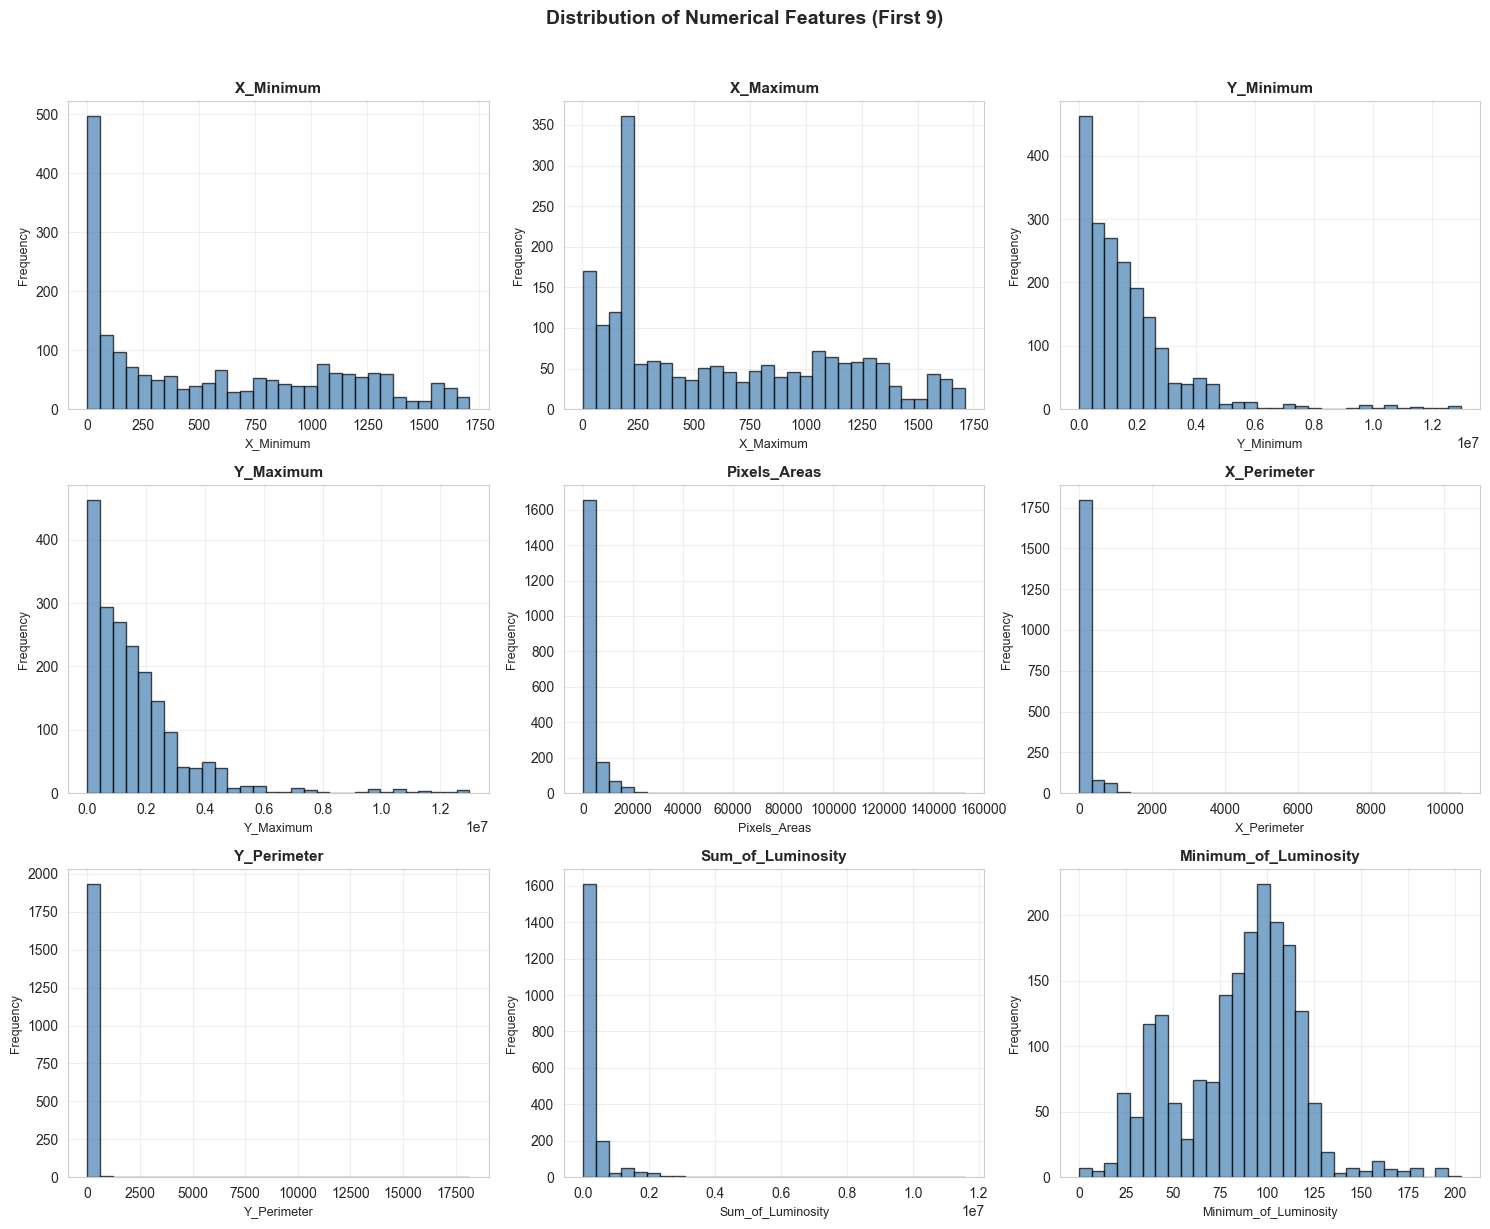


💡 What to look for in histograms:
   - Shape: Normal (bell curve), skewed, uniform?
   - Outliers: Extreme values far from the bulk of data
   - Multiple peaks: Could indicate subgroups in data


In [11]:
# Create histograms for first 9 numerical features
# Histograms show the frequency distribution of values

# Select first 9 features for visualization (to keep plots readable)
features_to_plot = numerical_features[:9]

# Create figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot histogram for each feature
for idx, feature in enumerate(features_to_plot):
    # bins=30 creates 30 bars in the histogram
    # edgecolor='black' adds black outlines to bars for clarity
    # alpha=0.7 makes bars slightly transparent
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Distribution of Numerical Features (First 9)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 What to look for in histograms:")
print("   - Shape: Normal (bell curve), skewed, uniform?")
print("   - Outliers: Extreme values far from the bulk of data")
print("   - Multiple peaks: Could indicate subgroups in data")

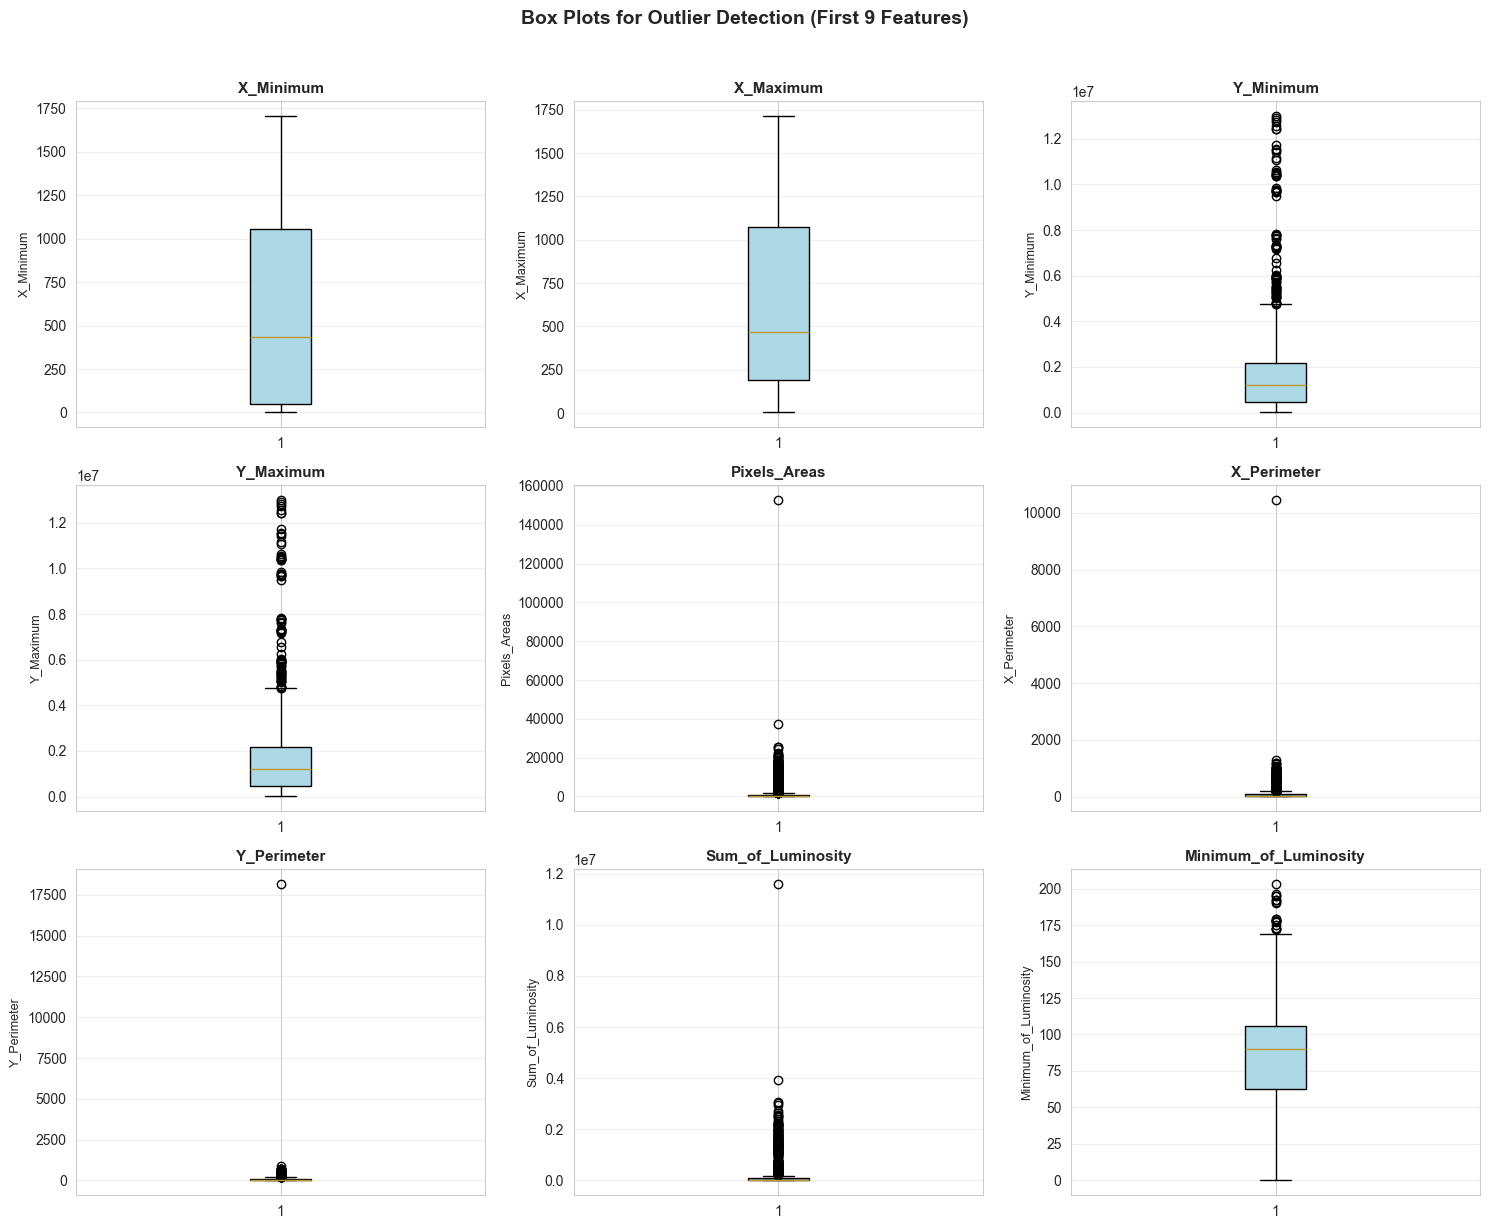


💡 How to read box plots:
   - Box: Contains middle 50% of data (25th to 75th percentile)
   - Line in box: Median (50th percentile)
   - Whiskers: Extend to 1.5 × IQR from box edges
   - Points beyond whiskers: Potential outliers


In [12]:
# Create box plots for outlier detection
# Box plots show:
# - Median (middle line)
# - Quartiles (box edges: 25% and 75%)
# - Outliers (points beyond whiskers)

# Select first 9 features for box plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    # Create box plot
    bp = axes[idx].boxplot(df[feature], vert=True, patch_artist=True)
    
    # Color the box
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Plots for Outlier Detection (First 9 Features)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 How to read box plots:")
print("   - Box: Contains middle 50% of data (25th to 75th percentile)")
print("   - Line in box: Median (50th percentile)")
print("   - Whiskers: Extend to 1.5 × IQR from box edges")
print("   - Points beyond whiskers: Potential outliers")

### 3.2 Aykırı Değer Tespit Özeti

In [13]:
# Detect outliers using IQR method for all numerical features
# IQR (Interquartile Range) = Q3 - Q1
# Outliers are typically values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR

print("🔍 Outlier Detection Summary (IQR Method):\n")
print("="*70)

outlier_summary = []

for feature in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outliers': n_outliers,
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower Bound': f"{lower_bound:.2f}",
        'Upper Bound': f"{upper_bound:.2f}"
    })

# Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outliers', ascending=False)
print(outlier_df.to_string(index=False))

# Summary statistics
total_outlier_features = (outlier_df['Outliers'] > 0).sum()
print(f"\n📊 Summary:")
print(f"   - Features with outliers: {total_outlier_features}/{len(numerical_features)}")
print(f"   - Features with >5% outliers: {(outlier_df['Outliers'] > len(df)*0.05).sum()}")

🔍 Outlier Detection Summary (IQR Method):

              Feature  Outliers Percentage Lower Bound Upper Bound
    Sum_of_Luminosity       399     20.56%  -100711.50   193244.50
         Pixels_Areas       395     20.35%    -1023.00     1929.00
      Outside_X_Index       370     19.06%       -0.02        0.05
          X_Perimeter       352     18.13%      -88.50      187.50
Steel_Plate_Thickness       240     12.36%      -20.00      140.00
          Y_Perimeter       179      9.22%      -92.00      188.00
Maximum_of_Luminosity       146      7.52%      100.00      164.00
     Luminosity_Index       134      6.90%       -0.39        0.13
            Y_Minimum        81      4.17% -2096477.00  4750803.00
            Y_Maximum        81      4.17% -2096423.50  4750788.50
          Log_X_Index        34      1.75%        0.22        2.30
          Empty_Index        20      1.03%        0.04        0.78
Minimum_of_Luminosity        20      1.03%       -1.50      170.50
           LogOfAre

---
## 4. Hedef Değişken Analizi

Hedef değişkeni analiz edin: Çelik Levha Hata Türü (Class).

In [14]:
# Analyze the target variable distribution
# This is critical - we need to know if classes are balanced

# Count the occurrences of each class
target_counts = df['Class'].value_counts()

# Calculate percentages
target_percentages = (target_counts / len(df) * 100).round(2)

# Print statistics
print("🎯 TARGET VARIABLE ANALYSIS: Steel Plate Fault Type\n")
print("="*60)
print(f"\nClass Distribution:")

for fault_type in target_counts.index:
    count = target_counts[fault_type]
    pct = target_percentages[fault_type]
    print(f"   {fault_type:15}: {count:4} samples ({pct:5.1f}%)")

print(f"\nTotal: {len(df):,} samples")
print(f"Number of classes: {len(target_counts)}")

# Check class balance
max_class = target_counts.max()
min_class = target_counts.min()
imbalance_ratio = max_class / min_class

print(f"\n📊 Class Balance Analysis:")
print(f"   - Largest class: {target_counts.idxmax()} ({max_class} samples)")
print(f"   - Smallest class: {target_counts.idxmin()} ({min_class} samples)")
print(f"   - Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("\n⚠️ Dataset is IMBALANCED!")
    print("   May need techniques like SMOTE or class weighting.")
elif imbalance_ratio > 1.5:
    print("\n⚠️ Dataset has SLIGHT IMBALANCE")
    print("   Standard algorithms should work, but monitor minority class performance.")
else:
    print("\n✅ Dataset is REASONABLY BALANCED")

🎯 TARGET VARIABLE ANALYSIS: Steel Plate Fault Type


Class Distribution:
   Other_Faults   :  673 samples ( 34.7%)
   Bumps          :  402 samples ( 20.7%)
   K_Scratch      :  391 samples ( 20.1%)
   Z_Scratch      :  190 samples (  9.8%)
   Pastry         :  158 samples (  8.1%)
   Stains         :   72 samples (  3.7%)
   Dirtiness      :   55 samples (  2.8%)

Total: 1,941 samples
Number of classes: 7

📊 Class Balance Analysis:
   - Largest class: Other_Faults (673 samples)
   - Smallest class: Dirtiness (55 samples)
   - Imbalance ratio: 12.24:1

⚠️ Dataset is IMBALANCED!
   May need techniques like SMOTE or class weighting.


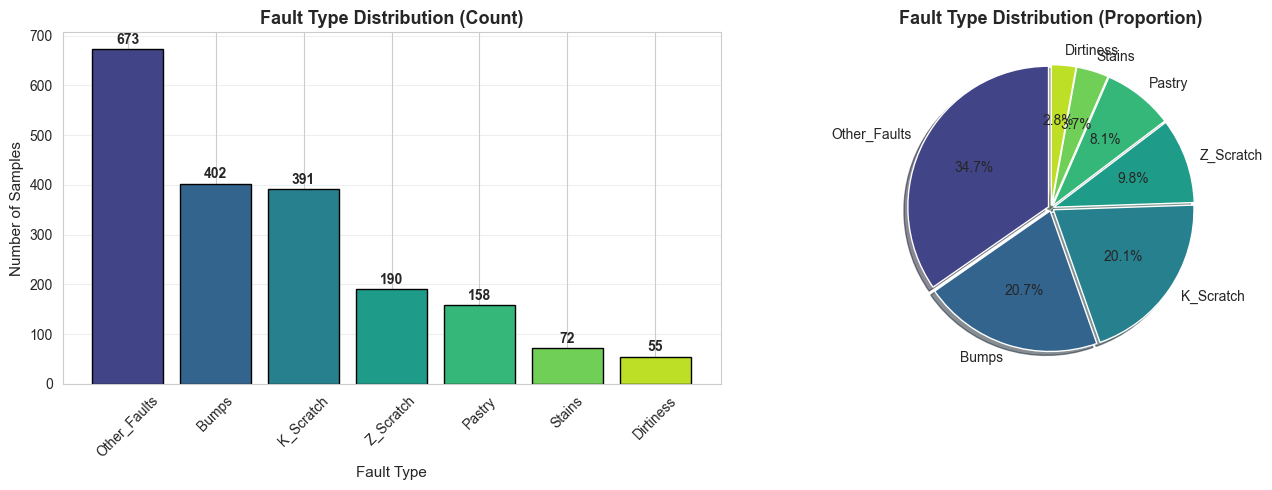


💡 Interpretation:
   - 'Other_Faults' is the largest class - may dominate predictions
   - 'Dirtiness' and 'Bumps' are smaller classes - may be harder to predict
   - Consider stratified sampling when splitting data


In [15]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Bar plot - shows absolute counts
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(target_counts)))
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Fault Type Distribution (Count)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Fault Type', fontsize=11)
axes[0].set_ylabel('Number of Samples', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, count in zip(bars, target_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Pie chart - shows proportions
explode = [0.02] * len(target_counts)
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=colors, explode=explode, shadow=True, startangle=90)
axes[1].set_title('Fault Type Distribution (Proportion)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - 'Other_Faults' is the largest class - may dominate predictions")
print("   - 'Dirtiness' and 'Bumps' are smaller classes - may be harder to predict")
print("   - Consider stratified sampling when splitting data")

---
## 5. İki Değişkenli Analiz

Her özelliğin hedef değişken (hata türü) ile ilişkisini analiz edin.

### 5.1 Hata Türüne Göre Özellik İstatistikleri

In [16]:
# Compare feature means across fault types
# This helps identify which features differ between classes

print("📊 Feature Means by Fault Type:\n")
print("="*80)

# Select important features for analysis
important_features = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 
                      'Sum_of_Luminosity', 'Edges_Index', 'Square_Index']

# Calculate mean for each feature by class
feature_means = df.groupby('Class')[important_features].mean()

# Display the table
print(feature_means.round(2).T)

print("\n💡 Look for features with large differences between classes")
print("   - These features may be good predictors of fault type")

📊 Feature Means by Fault Type:

Class                 Bumps  Dirtiness  K_Scratch  Other_Faults    Pastry  \
Pixels_Areas         238.47     363.49    7622.65        584.37    561.62   
X_Perimeter           29.25      45.16     384.66         52.79     35.56   
Y_Perimeter           23.74      57.85     255.35         43.87     57.73   
Sum_of_Luminosity  26102.78   40545.05  835433.60      61570.49  61262.84   
Edges_Index            0.47       0.51       0.13          0.37      0.30   
Square_Index           0.71       0.23       0.60          0.54      0.35   

Class               Stains  Z_Scratch  
Pixels_Areas         19.92     506.59  
X_Perimeter           8.22      56.47  
Y_Perimeter           5.32      49.67  
Sum_of_Luminosity  2486.12   51466.19  
Edges_Index           0.58       0.19  
Square_Index          0.71       0.57  

💡 Look for features with large differences between classes
   - These features may be good predictors of fault type


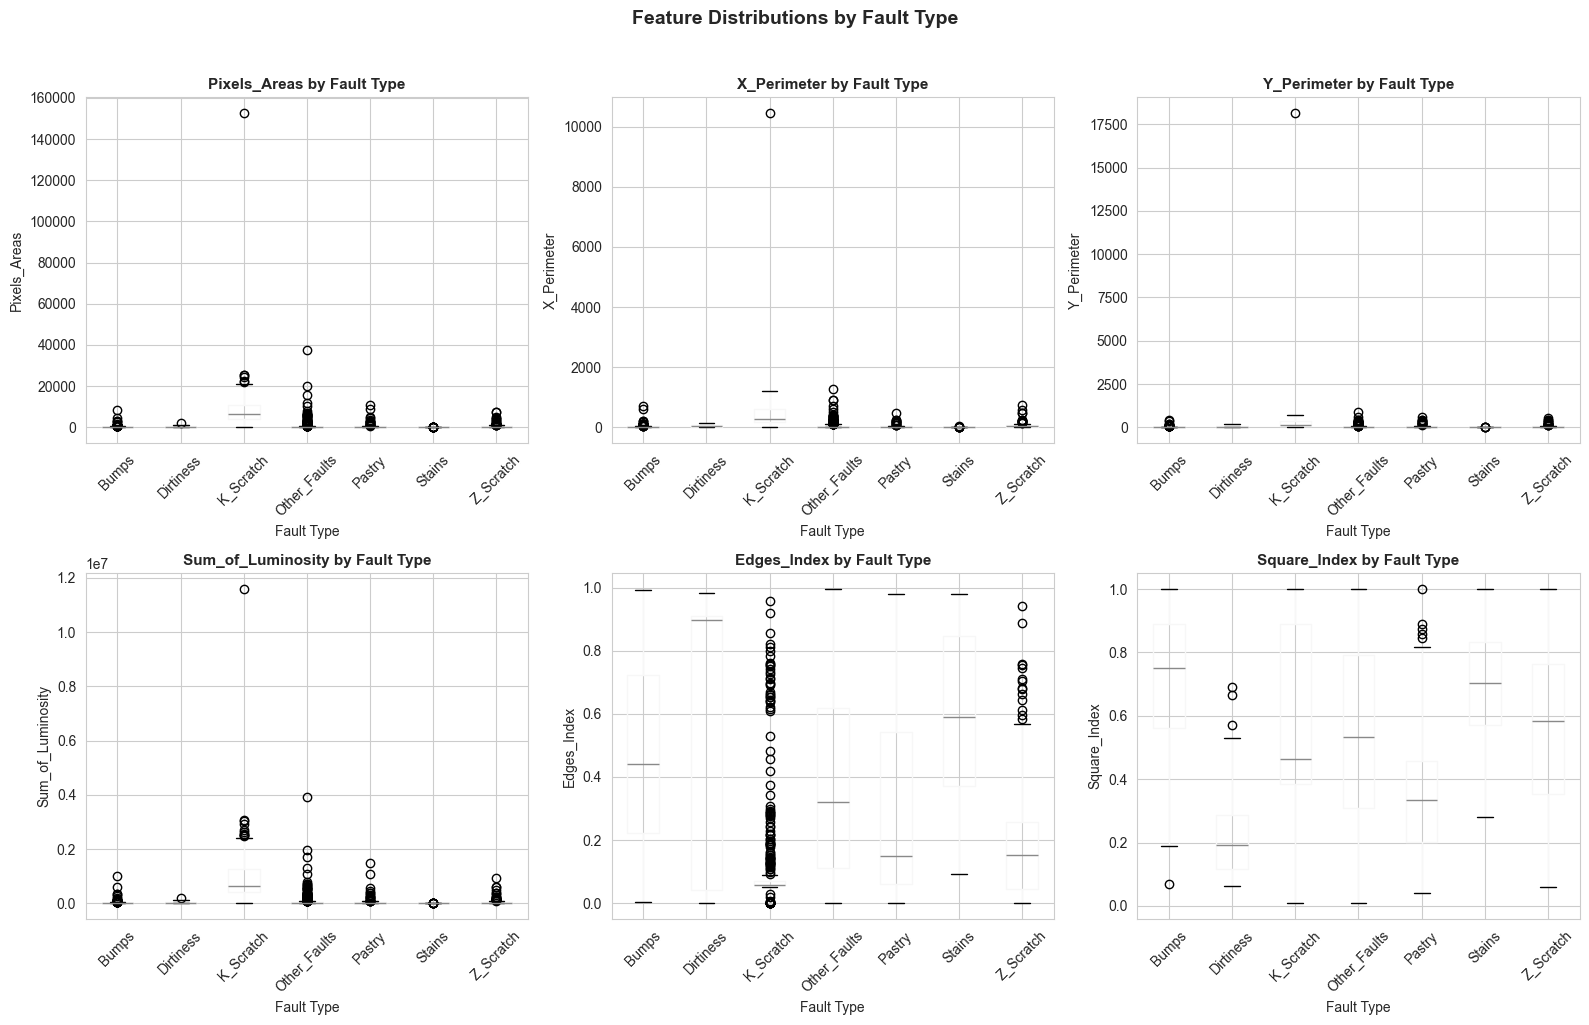


💡 What to look for:
   - Different medians → Feature may be predictive of fault type
   - Overlapping boxes → Less discriminative power
   - Large differences → Strong relationship with target


In [17]:
# Create box plots comparing features by fault type
# This shows distribution differences between classes

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(important_features):
    # Create box plot grouped by class
    df.boxplot(column=feature, by='Class', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Fault Type', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Fault Type', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Feature Distributions by Fault Type', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 What to look for:")
print("   - Different medians → Feature may be predictive of fault type")
print("   - Overlapping boxes → Less discriminative power")
print("   - Large differences → Strong relationship with target")

---
## 6. Çok Değişkenli Analiz

Birden fazla özellik arasındaki ilişkileri aynı anda analiz edin.

### 6.1 Korelasyon Matrisi

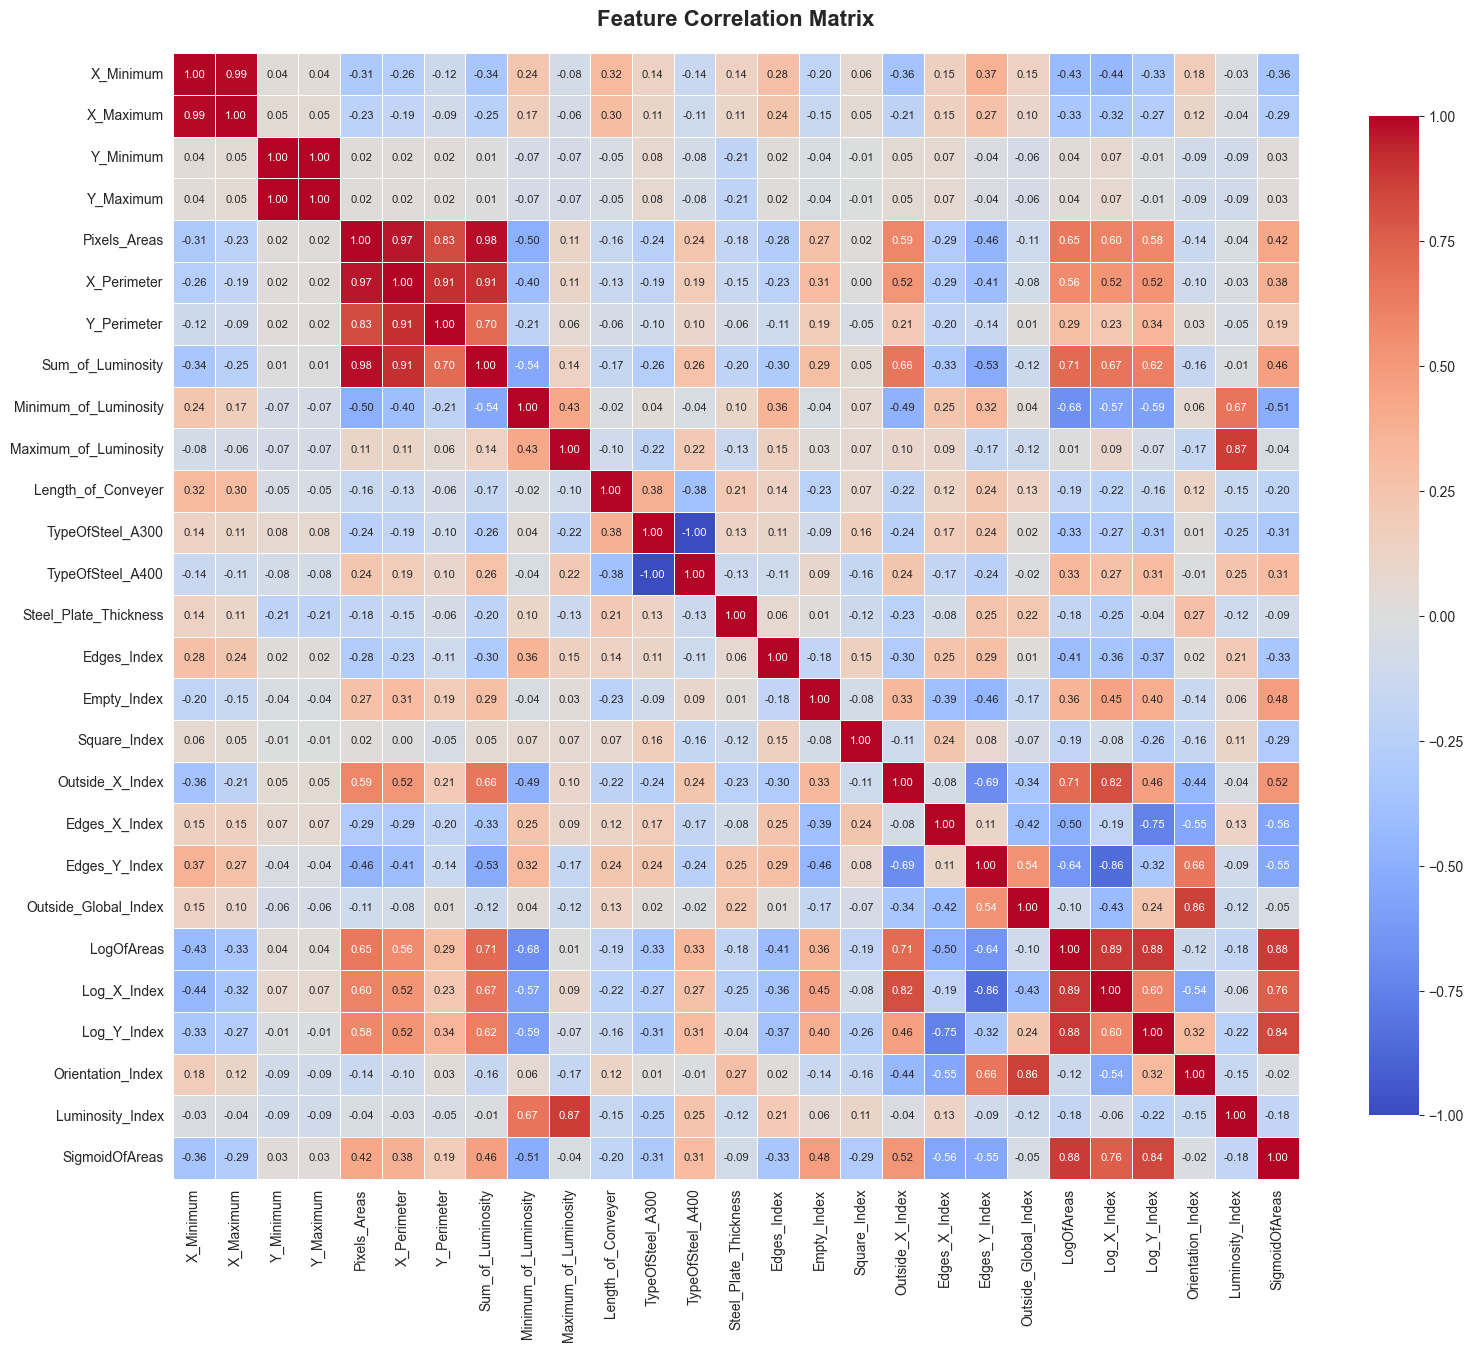


💡 How to interpret correlations:
   - |r| > 0.7: Strong correlation (features are highly related)
   - |r| > 0.4: Moderate correlation (some relationship)
   - |r| < 0.3: Weak correlation (little linear relationship)


In [18]:
# Calculate correlation matrix for numerical features
# Correlation measures linear relationship between variables
# Values range from -1 (perfect negative) to +1 (perfect positive)

# Select numerical features only
numerical_df = df[numerical_features]

# Calculate Pearson correlation
correlation_matrix = numerical_df.corr()

# Create large heatmap
plt.figure(figsize=(16, 14))

# Create heatmap
# annot=True displays correlation values
# fmt='.2f' formats to 2 decimal places
# cmap='coolwarm' uses blue-white-red color scheme
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 How to interpret correlations:")
print("   - |r| > 0.7: Strong correlation (features are highly related)")
print("   - |r| > 0.4: Moderate correlation (some relationship)")
print("   - |r| < 0.3: Weak correlation (little linear relationship)")

In [19]:
# Find highly correlated feature pairs
# High correlation between features can cause multicollinearity

print("🔍 Highly Correlated Feature Pairs (|r| > 0.7):\n")
print("="*60)

# Get upper triangle of correlation matrix
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

# Sort by absolute correlation
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if len(high_corr_pairs) > 0:
    for f1, f2, corr in high_corr_pairs:
        print(f"   {f1} <-> {f2}: {corr:.3f}")
    print(f"\n📊 Found {len(high_corr_pairs)} highly correlated pairs")
    print("\n💡 Consider:")
    print("   - Removing one feature from each pair")
    print("   - Using PCA for dimensionality reduction")
else:
    print("   No feature pairs with |r| > 0.7 found")

🔍 Highly Correlated Feature Pairs (|r| > 0.7):

   TypeOfSteel_A300 <-> TypeOfSteel_A400: -1.000
   Y_Minimum <-> Y_Maximum: 1.000
   X_Minimum <-> X_Maximum: 0.988
   Pixels_Areas <-> Sum_of_Luminosity: 0.979
   Pixels_Areas <-> X_Perimeter: 0.967
   X_Perimeter <-> Sum_of_Luminosity: 0.913
   X_Perimeter <-> Y_Perimeter: 0.912
   LogOfAreas <-> Log_X_Index: 0.889
   LogOfAreas <-> Log_Y_Index: 0.883
   LogOfAreas <-> SigmoidOfAreas: 0.878
   Maximum_of_Luminosity <-> Luminosity_Index: 0.870
   Outside_Global_Index <-> Orientation_Index: 0.863
   Edges_Y_Index <-> Log_X_Index: -0.855
   Log_Y_Index <-> SigmoidOfAreas: 0.838
   Pixels_Areas <-> Y_Perimeter: 0.827
   Outside_X_Index <-> Log_X_Index: 0.820
   Log_X_Index <-> SigmoidOfAreas: 0.757
   Edges_X_Index <-> Log_Y_Index: -0.749
   Sum_of_Luminosity <-> LogOfAreas: 0.712
   Outside_X_Index <-> LogOfAreas: 0.711
   Y_Perimeter <-> Sum_of_Luminosity: 0.705

📊 Found 21 highly correlated pairs

💡 Consider:
   - Removing one feature f

---
## 7. Veri Kalitesi Değerlendirmesi

EDA sırasında bulunan tüm veri kalitesi sorunlarının kapsamlı dokümantasyonu.

In [20]:
# Create comprehensive data quality report
print("📋 COMPREHENSIVE DATA QUALITY REPORT")
print("="*70)
print(f"\nDataset: Steel Plates Fault Detection")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {df.shape[1]} (including target)")
print("="*70)

# Issue 1: Missing Values
print("\n1. MISSING VALUES")
print("-"*70)
missing_count = df.isnull().sum().sum()
if missing_count == 0:
    print("   ✅ STATUS: GOOD")
    print("   No missing values detected in any column.")
else:
    print(f"   ⚠️ STATUS: ISSUES FOUND")
    print(f"   Total missing values: {missing_count:,}")

# Issue 2: Duplicate Records
print("\n2. DUPLICATE RECORDS")
print("-"*70)
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"   ⚠️ STATUS: ISSUES FOUND")
    print(f"   Duplicate records: {num_duplicates:,} ({num_duplicates/len(df)*100:.2f}%)")
else:
    print("   ✅ STATUS: GOOD")
    print("   No duplicate records found.")

# Issue 3: Outliers Summary
print("\n3. OUTLIER SUMMARY")
print("-"*70)
total_outlier_count = 0
features_with_outliers = 0
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1-1.5*IQR) | (df[feature] > Q3+1.5*IQR)]
    if len(outliers) > 0:
        features_with_outliers += 1
        total_outlier_count += len(outliers)

print(f"   Features with outliers: {features_with_outliers}/{len(numerical_features)}")
print(f"   Total outlier instances: {total_outlier_count:,}")

# Issue 4: Class Balance
print("\n4. CLASS BALANCE")
print("-"*70)
class_counts = df['Class'].value_counts()
imbalance = class_counts.max() / class_counts.min()
if imbalance > 3:
    print(f"   ⚠️ STATUS: IMBALANCED (ratio: {imbalance:.2f}:1)")
else:
    print(f"   ✅ STATUS: ACCEPTABLE (ratio: {imbalance:.2f}:1)")

# Issue 5: Highly Correlated Features
print("\n5. HIGHLY CORRELATED FEATURES")
print("-"*70)
if len(high_corr_pairs) > 0:
    print(f"   ⚠️ Found {len(high_corr_pairs)} pairs with |r| > 0.7")
    print("   Consider dimensionality reduction.")
else:
    print("   ✅ No highly correlated feature pairs found.")

print("\n" + "="*70)
print("END OF DATA QUALITY REPORT")
print("="*70)

📋 COMPREHENSIVE DATA QUALITY REPORT

Dataset: Steel Plates Fault Detection
Total Records: 1,941
Total Features: 28 (including target)

1. MISSING VALUES
----------------------------------------------------------------------
   ✅ STATUS: GOOD
   No missing values detected in any column.

2. DUPLICATE RECORDS
----------------------------------------------------------------------
   ✅ STATUS: GOOD
   No duplicate records found.

3. OUTLIER SUMMARY
----------------------------------------------------------------------
   Features with outliers: 15/27
   Total outlier instances: 2,461

4. CLASS BALANCE
----------------------------------------------------------------------
   ⚠️ STATUS: IMBALANCED (ratio: 12.24:1)

5. HIGHLY CORRELATED FEATURES
----------------------------------------------------------------------
   ⚠️ Found 21 pairs with |r| > 0.7
   Consider dimensionality reduction.

END OF DATA QUALITY REPORT


---
## 8. Özet ve Sonraki Adımlar

### 🎯 Temel Bulgular

**Veri Seti Özellikleri:**
- 27 özellik ile 1.941 çelik levha örneği
- 7 hata türü (çok sınıflı sınıflandırma problemi)
- Eksik değer yok ✅
- Sayısal özelliklerde bazı aykırı değerler tespit edildi

**Sınıf Dağılımı:**
- Dengesiz sınıflar (bazı hata türleri nadir)
- 'Other_Faults' en büyük sınıf
- Katmanlı örnekleme veya sınıf ağırlıklandırma gerekebilir

**Özellik Görüşleri:**
- Bazı özellikler arasında güçlü korelasyonlar var
- Geometrik özellikler (X, Y koordinatları) bilgilendirici
- Parlaklık özellikleri hata türlerine göre farklılık gösteriyor

### 📌 Ön İşleme İçin Öneriler

1. **Aykırı değerleri işle**: Aşırı değerleri incele
2. **Özellik seçimi**: Yüksek korelasyonlu özellikleri kaldırmayı düşün
3. **Ölçekleme**: Modelleme öncesi StandardScaler uygula
4. **Katmanlı bölme**: Eğitim/test setlerinde sınıf oranlarını koru

### 🚀 Sonraki Adımlar

1. **Veri Ön İşleme**: Veriyi temizle ve hazırla
2. **Özellik Mühendisliği**: Yeni bilgilendirici özellikler oluştur
3. **Model Eğitimi**: Birden fazla sınıflandırma modeli eğit
4. **Model Değerlendirmesi**: En iyi modeli karşılaştır ve seç

---

✅ **Aşama 1 (EDA) Tamamlandı!**

Artık sahipsiniz:
- ✓ Veri setinin derin bir anlayışı
- ✓ Tüm veri kalitesi sorunlarını belirleme
- ✓ Ön işleme için net plan
- ✓ Özellik mühendisliği için içgörüler

Aşama 2: Veri Ön İşleme'ye geçmeye hazır! 🎉